In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

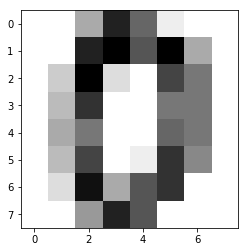

0


In [2]:
digits = datasets.load_digits()
plt.imshow(digits.images[0],cmap='binary')
plt.show()
print(digits.target[0])
# dir(digits)
# digits.images.shape

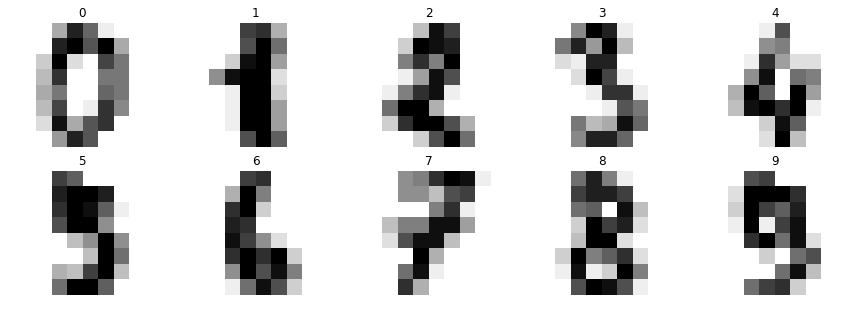

In [3]:
fig = plt.figure(figsize = (15,5))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap = 'binary')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()

In [4]:
x = digits.images.reshape((digits.images.shape[0],
                           digits.images.shape[1] * digits.images.shape[2]))
y = digits.target

x_train = x[:1000]
y_train = y[:1000]

x_test = x[1000:]
y_test = y[1000:]

In [5]:
from sklearn.neural_network import MLPClassifier

In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                   activation='logistic',
                   solver = 'sgd',
                   tol = 1e-4,
                   learning_rate_init=.1,
                   verbose=True)

In [38]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.21196592
Iteration 2, loss = 1.84870547
Iteration 3, loss = 1.55399269
Iteration 4, loss = 1.25042288
Iteration 5, loss = 0.98026917
Iteration 6, loss = 0.76737640
Iteration 7, loss = 0.61087920
Iteration 8, loss = 0.49902293
Iteration 9, loss = 0.41284061
Iteration 10, loss = 0.34979010
Iteration 11, loss = 0.29597867
Iteration 12, loss = 0.25746321
Iteration 13, loss = 0.22543748
Iteration 14, loss = 0.20286801
Iteration 15, loss = 0.18071454
Iteration 16, loss = 0.16503320
Iteration 17, loss = 0.15328924
Iteration 18, loss = 0.14004932
Iteration 19, loss = 0.13154015
Iteration 20, loss = 0.12127660
Iteration 21, loss = 0.11408281
Iteration 22, loss = 0.10612062
Iteration 23, loss = 0.09998770
Iteration 24, loss = 0.09682209
Iteration 25, loss = 0.09170494
Iteration 26, loss = 0.08640903
Iteration 27, loss = 0.08231785
Iteration 28, loss = 0.07981743
Iteration 29, loss = 0.07456087
Iteration 30, loss = 0.07239907
Iteration 31, loss = 0.06917276
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [39]:
predictions = mlp.predict(x_test)
print(predictions[:10])
print(y_test[:10])

[1 4 0 5 3 6 9 6 1 7]
[1 4 0 5 3 6 9 6 1 7]


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,predictions)

array([[74,  0,  1,  0,  0,  2,  1,  1,  0,  0],
       [ 1, 70,  0,  1,  1,  1,  0,  0,  2,  4],
       [ 0,  0, 75,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 66,  0,  4,  1,  0,  6,  1],
       [ 0,  1,  0,  0, 79,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 77,  4,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 78,  0,  1,  0],
       [ 0,  0,  0,  0,  4,  0,  0, 75,  0,  1],
       [ 1,  3,  2,  1,  1,  3,  0,  1, 63,  1],
       [ 2,  0,  0,  1,  0,  3,  0,  1,  1, 73]], dtype=int64)

In [42]:
import pandas as pd

In [43]:
pd.crosstab(y_test,predictions,rownames=["True"],colnames=["pradicted"],margins = True)

pradicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,74,0,1,0,0,2,1,1,0,0,79
1,1,70,0,1,1,1,0,0,2,4,80
2,0,0,75,2,0,0,0,0,0,0,77
3,0,0,1,66,0,4,1,0,6,1,79
4,0,1,0,0,79,0,0,0,0,3,83
5,0,0,0,0,0,77,4,0,0,1,82
6,0,1,0,0,0,0,78,0,1,0,80
7,0,0,0,0,4,0,0,75,0,1,80
8,1,3,2,1,1,3,0,1,63,1,76


In [44]:
error = []
for i in range(0,len(y_test)):
    if predictions[i] == 9 and y_test[i] == 1:
        error.append(i+1000)

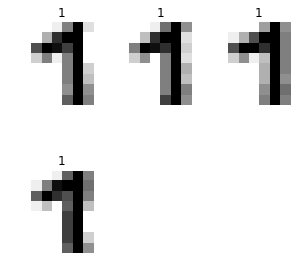

In [45]:
fig = plt.figure(figsize = (5,5))
for i in range(0,len(error)):
    plt.subplot(2,3,i+1)
    plt.imshow(digits.images[error[i]], cmap = 'binary')
    plt.title(digits.target[error[i]])
    plt.axis('off')
plt.show()